# Final Lab Exam
## Author : Balaji Muthazhagan T

In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('Sapfile1.arff')
df = pd.DataFrame(data[0])

df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,b'F',b'G',b'Good',b'Good',b'Vg',b'Good',b'Y',b'Unmarried',b'V',b'Paid',...,b'Um',b'10',b'Farmer',b'Housewife',b'Large',b'Poor',b'Govt',b'Asm',b'Small',b'Good'
1,b'M',b'OBC',b'Vg',b'Vg',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'Um',b'Il',b'Service',b'Service',b'Small',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
2,b'F',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'10',b'Service',b'Housewife',b'Average',b'Average',b'Govt',b'Asm',b'Large',b'Good'
3,b'M',b'MOBC',b'Pass',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'Um',b'Business',b'Business',b'Large',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
4,b'M',b'G',b'Good',b'Good',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'10',b'12',b'Service',b'Housewife',b'Large',b'Poor',b'Private',b'Asm',b'Small',b'Good'


On analyzing the code, we can see that it is in byte format

In [2]:
df.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,...,6,6,5,5,3,3,2,4,3,3
top,b'M',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'Um',b'Um',b'Service',b'Housewife',b'Large',b'Average',b'Govt',b'Eng',b'Small',b'Good'
freq,72,57,59,65,63,54,78,131,92,76,...,40,52,38,115,58,59,91,62,78,56


We can also see that all the entries are objects, and not as numeric entries which makes it tough for  correlation analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
ge     131 non-null object
cst    131 non-null object
tnp    131 non-null object
twp    131 non-null object
iap    131 non-null object
esp    131 non-null object
arr    131 non-null object
ms     131 non-null object
ls     131 non-null object
as     131 non-null object
fmi    131 non-null object
fs     131 non-null object
fq     131 non-null object
mq     131 non-null object
fo     131 non-null object
mo     131 non-null object
nf     131 non-null object
sh     131 non-null object
ss     131 non-null object
me     131 non-null object
tt     131 non-null object
atd    131 non-null object
dtypes: object(22)
memory usage: 22.6+ KB


There are no null values in the data

In [4]:
pd.isnull(df).any()

ge     False
cst    False
tnp    False
twp    False
iap    False
esp    False
arr    False
ms     False
ls     False
as     False
fmi    False
fs     False
fq     False
mq     False
fo     False
mo     False
nf     False
sh     False
ss     False
me     False
tt     False
atd    False
dtype: bool

We convert the data into unicode format

In [5]:
# Converting to unicode format
for i in df.columns:
    df[i]=df[i].str.decode('utf-8')

In [6]:
df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


In [7]:
df.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,...,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,...,40,52,38,115,58,59,91,62,78,56


The various visualizations are as follows:

In [8]:
import matplotlib.pyplot as plt
df["ge"].value_counts().plot.bar()

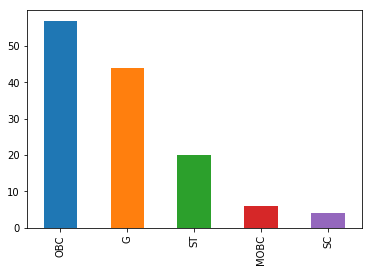

In [9]:
df["cst"].value_counts().plot.bar()

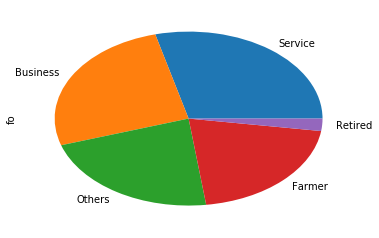

In [10]:
df["fo"].value_counts().plot.pie()

In [11]:
df.describe()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,...,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,...,40,52,38,115,58,59,91,62,78,56


We can see that the correlation matrix returns an empty value because everything is of object datatype, let us convert it into numeric datatype

In [12]:
df.corr()

""


In [13]:
df.columns

Index(['ge', 'cst', 'tnp', 'twp', 'iap', 'esp', 'arr', 'ms', 'ls', 'as', 'fmi',
       'fs', 'fq', 'mq', 'fo', 'mo', 'nf', 'sh', 'ss', 'me', 'tt', 'atd'],
      dtype='object')

# Identification of columns

The question describes to predict the end semester percentage based on various social, economic and academic attributes

The features that we have enlisted are<br>
'tnp','twp','esp','fmi','fs','nf','tt'<br>

### Academic:
tnp : Class X percentage<br>
tnp : Class XII percentage<br>

### Economic:
fmi : Family Monthly Income<br>

### Social:
fs  : Family size<br>
nf  : Number of Friends<br>

### Classification feature:
esp : End semester percentage<br>

The first step is to convert the object values into numeric datatype for classification and correlation analysis

For marks we are assigning the following<br>

Let us assign<br>
Pass 1<br>
Good as 2<br>
Vg (Very good) as 3<br>
Best 4<br>

In [14]:
#End semester percentage
df['esp'].unique()

array(['Good', 'Vg', 'Best', 'Pass'], dtype=object)

In [15]:
# Acdemic tnp, twp and inp
df['tnp'].unique()

array(['Good', 'Vg', 'Pass', 'Best'], dtype=object)

In [16]:
df['twp'].unique()

array(['Good', 'Vg', 'Pass', 'Best'], dtype=object)

In [17]:
df['iap'].unique()

array(['Vg', 'Good', 'Pass', 'Best'], dtype=object)

In [18]:
df=df.replace('Good',2)
df=df.replace('Vg',3)
df=df.replace('Pass',1)
df=df.replace('Best',4)

In [19]:
df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,2,2,3,2,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,2
1,M,OBC,3,3,3,3,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,2,2,3,2,N,Unmarried,V,Paid,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,2
3,M,MOBC,1,2,3,2,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,2,2,3,3,N,Unmarried,V,Paid,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,2


For family size and no of friends we are assigning the following<br>

Let us assign<br>
Small 1<br>
Average 2<br>
Large 3<br>

In [20]:
df['fs'].unique()

array(['Average', 'Small', 'Large'], dtype=object)

In [21]:
df=df.replace('Average',2)
df=df.replace('Small',1)
df=df.replace('Large',3)
df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,2,2,3,2,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,3,Poor,Govt,Asm,1,2
1,M,OBC,3,3,3,3,N,Unmarried,V,Paid,...,Um,Il,Service,Service,1,Poor,Govt,Asm,2,2
2,F,OBC,2,2,3,2,N,Unmarried,V,Paid,...,12,10,Service,Housewife,2,2,Govt,Asm,3,2
3,M,MOBC,1,2,3,2,N,Unmarried,V,Paid,...,12,Um,Business,Business,3,Poor,Govt,Asm,2,2
4,M,G,2,2,3,3,N,Unmarried,V,Paid,...,10,12,Service,Housewife,3,Poor,Private,Asm,1,2


In [22]:
df['fs'].unique()

array([2, 1, 3], dtype=int64)

In [23]:
df['tnp'].unique()

array([2, 3, 1, 4], dtype=int64)

For fmi we are assigning the following<br>

Medium 2<br>
Low 1<br>
Am 3<br>
High 4<br>
Vh 5<br>

In [24]:
# Economic fmi
df['fmi'].unique()

array(['Medium', 'Low', 'Am', 'High', 'Vh'], dtype=object)

In [25]:
df=df.replace('Medium',2)
df=df.replace('Low',1)
df=df.replace('Am',3)
df=df.replace('High',4)
df=df.replace('Vh',5)
df['fmi'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [26]:
df.dtypes

ge     object
cst    object
tnp     int64
twp     int64
iap     int64
esp     int64
arr    object
ms     object
ls     object
as     object
fmi     int64
fs      int64
fq     object
mq     object
fo     object
mo     object
nf      int64
sh     object
ss     object
me     object
tt      int64
atd    object
dtype: object

In [27]:
df2 = df[['tnp','twp','esp','fmi','fs','nf','tt']]

In [28]:
df2.head()

,tnp,twp,esp,fmi,fs,nf,tt
0,2,2,2,2,2,3,1
1,3,3,3,1,2,1,2
2,2,2,2,3,2,2,3
3,1,2,2,2,1,3,2
4,2,2,3,3,2,3,1


# Descriptive Analysis between attributes

In [29]:
# Visualizing the essential attributes
df2.corr()

,tnp,twp,esp,fmi,fs,nf,tt
tnp,1.000000,0.612363,0.665497,0.097700,-0.025591,0.108114,-0.113782
twp,0.612363,1.000000,0.630393,0.227759,-0.008830,0.132668,-0.062219
esp,0.665497,0.630393,1.000000,0.140645,-0.097024,0.141181,-0.183726
fmi,0.097700,0.227759,0.140645,1.000000,-0.006992,0.162145,-0.017013
fs,-0.025591,-0.008830,-0.097024,-0.006992,1.000000,-0.122697,0.067865
nf,0.108114,0.132668,0.141181,0.162145,-0.122697,1.000000,-0.159186
tt,-0.113782,-0.062219,-0.183726,-0.017013,0.067865,-0.159186,1.000000


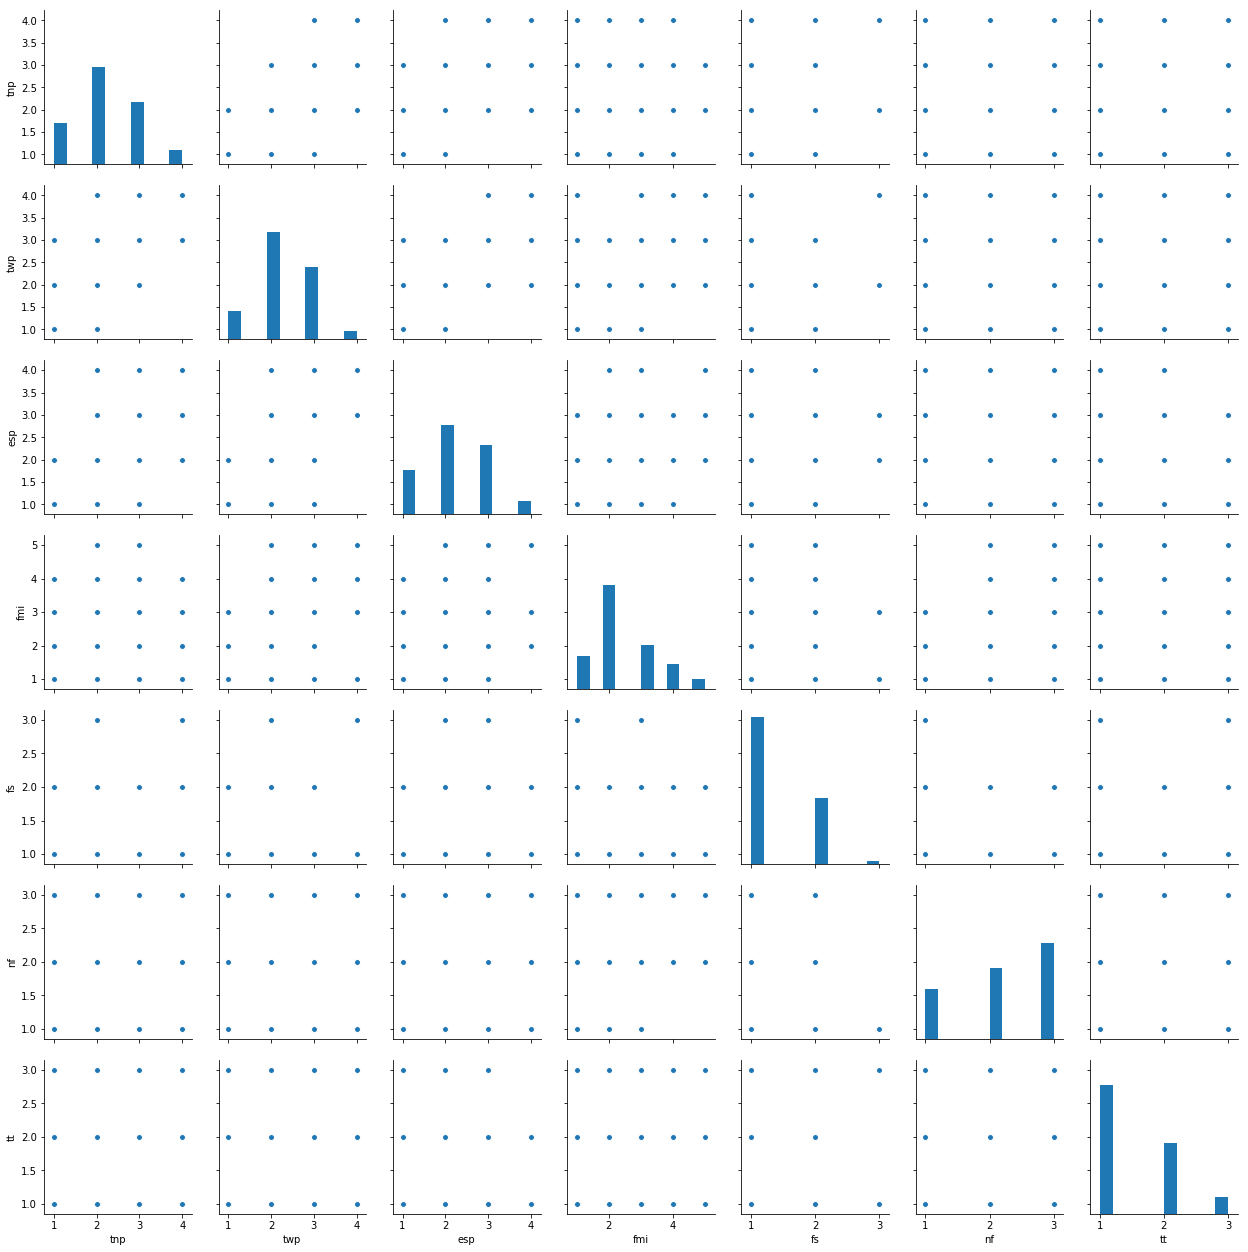

In [30]:
import seaborn as sns
sns.pairplot(df2)

In [31]:
# Descriptive statistics
df2.describe()

,tnp,twp,esp,fmi,fs,nf,tt
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,2.236641,2.282443,2.236641,2.419847,1.335878,2.213740,1.480916
std,0.839707,0.736675,0.848819,1.029968,0.505519,0.794284,0.636712
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,3.000000


# Classfication Algorithms

In [32]:
feature_names = ['tnp', 'twp', 'fmi', 'fs','nf','tt']
X = df2[feature_names]
# end semester percentage
y = df2['esp']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.64
Accuracy of Logistic regression classifier on test set: 0.55


## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.92
Accuracy of Decision Tree classifier on test set: 0.45


## K Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.52


## Linear Discriminant Analysis

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.70
Accuracy of LDA classifier on test set: 0.55


## Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.52
Accuracy of GNB classifier on test set: 0.36


## SVM

In [39]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.62
Accuracy of SVM classifier on test set: 0.58


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 1  3  1  0]
 [ 2 11  2  0]
 [ 0  4  5  0]
 [ 0  1  3  0]]
             precision    recall  f1-score   support

          1       0.33      0.20      0.25         5
          2       0.58      0.73      0.65        15
          3       0.45      0.56      0.50         9
          4       0.00      0.00      0.00         4

avg / total       0.44      0.52      0.47        33



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Result

### Decision Tree gave the highest accuracy